# Рекомендация тарифов

## Открываем и изучаем файл

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression




Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
df.duplicated().sum()

0

In [6]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

In [7]:
corel = df.corr()
display(corel)

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


In [8]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [9]:
df.sample(5)

,calls,minutes,messages,mb_used,is_ultra
3014,57.0,368.96,0.0,16890.11,0
1327,2.0,10.59,50.0,21507.94,0
2483,90.0,603.11,6.0,16294.44,0
2089,86.0,649.85,61.0,29374.16,1
1255,14.0,96.95,37.0,17190.83,0


## Разбиваем данные на выборки

###  Разделим выборку на обучающую, валидационную и тестовую


Для разделения выборки будем соблюдать пропорции 60 : 20 : 20 

In [10]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra'] 

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
dtypes: float64(4)
memory usage: 100.6 KB


In [12]:
target.head()

0    0
1    0
2    0
3    1
4    0
Name: is_ultra, dtype: int64

In [13]:
# делю выборку на тестовую и иную (обучающую/валидационную) 20/80
features_working, features_test, target_working, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345, stratify=target)

In [14]:
# делю иную выборку на обучающую и валидационную  60/20
features_train, features_valid, target_train, target_valid = train_test_split(
    features_working, target_working, test_size=0.25, random_state=12345, stratify=target_working)

In [15]:
print(f"Количество строк в target_test по классам: {np.bincount(target_test)}")
print(f"Количество строк в target_valid по классам: {np.bincount(target_valid)}")
print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")

Количество строк в target_test по классам: [446 197]
Количество строк в target_valid по классам: [446 197]
Количество строк в target_train по классам: [1337  591]


In [16]:
features_train.shape, features_valid.shape, features_test.shape


((1928, 4), (643, 4), (643, 4))

In [17]:
target_train.shape, target_valid.shape, target_test.shape

((1928,), (643,), (643,))

In [18]:
print(f'Модель будет учится на выборке, что составляет {round(features_train.shape[0]/df.shape[0] * 100)} процентов от выборки' )

Модель будет учится на выборке, что составляет 60 процентов от выборки


In [19]:
print(f'Модель будет тестироваться на выборке, что составляет {round(features_valid.shape[0]/df.shape[0] * 100)} процентов от выборки' )

Модель будет тестироваться на выборке, что составляет 20 процентов от выборки


In [20]:
print(f'Модель будет валидироваться на выборке, что составляет {round(features_test.shape[0]/df.shape[0] * 100)} процентов от выборки' )

Модель будет валидироваться на выборке, что составляет 20 процентов от выборки


In [21]:
target_train.shape, target_valid.shape, target_test.shape

((1928,), (643,), (643,))

* подготовленны данные для обучения модели: features_train, target_train
* подготовленны данные для валидации модели: features_valid, target_valid
* подготовлены тестовые данные: features_test, target_test

### Изучим модель - дерево решений

In [22]:
best_model_dt = None
best_result = 0
best_depth = 0

depth = []
accuracy_train_list = []
accuracy_test_list = []

for est in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=est) 
    fit = model.fit(features_train, target_train)
    
    predictions_train = model.predict(features_train)
    predictions_test = model.predict(features_test)
    
    accuracy_train = accuracy_score(target_train, predictions_train)
    accuracy_test = accuracy_score(target_test, predictions_test)
    
    print("max_depth =", est, ": ", end='')
    print(accuracy_test)
    
    depth.append(est)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)
    
       
    if accuracy_test > best_result:
        best_model_dt = model
        best_result = accuracy_test
        best_depth = est
        

print(f"Accuracy наилучшей модели на шаге {best_depth} на тестовой выборке:", best_result)

max_depth = 1 : 0.7480559875583204
max_depth = 2 : 0.7853810264385692
max_depth = 3 : 0.7993779160186625
max_depth = 4 : 0.7838258164852255
max_depth = 5 : 0.7962674961119751
max_depth = 6 : 0.7978227060653188
max_depth = 7 : 0.7822706065318819
max_depth = 8 : 0.7791601866251944
max_depth = 9 : 0.7822706065318819
max_depth = 10 : 0.7822706065318819
Accuracy наилучшей модели на шаге 3 на тестовой выборке: 0.7993779160186625


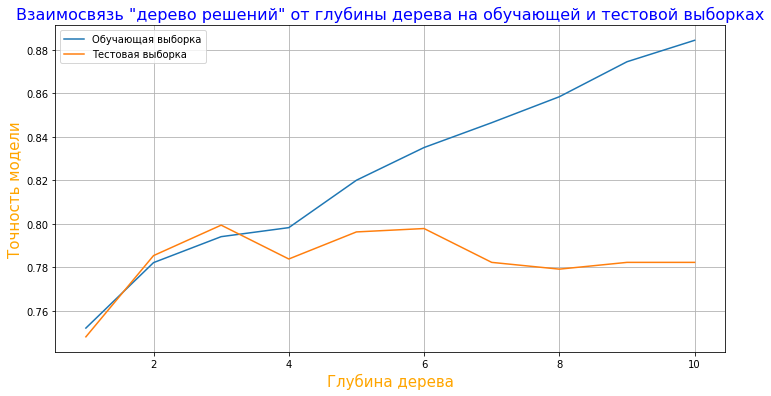

In [23]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(depth, accuracy_train_list)
plt.plot(depth, accuracy_test_list)
plt.xlabel('Глубина дерева', color = 'Orange', fontsize=15)
plt.ylabel('Точность модели', color = 'Orange', fontsize=15)
plt.title('Взаимосвязь "дерево решений" от глубины дерева на обучающей и тестовой выборках', 
          color = 'Blue', fontsize=16)
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

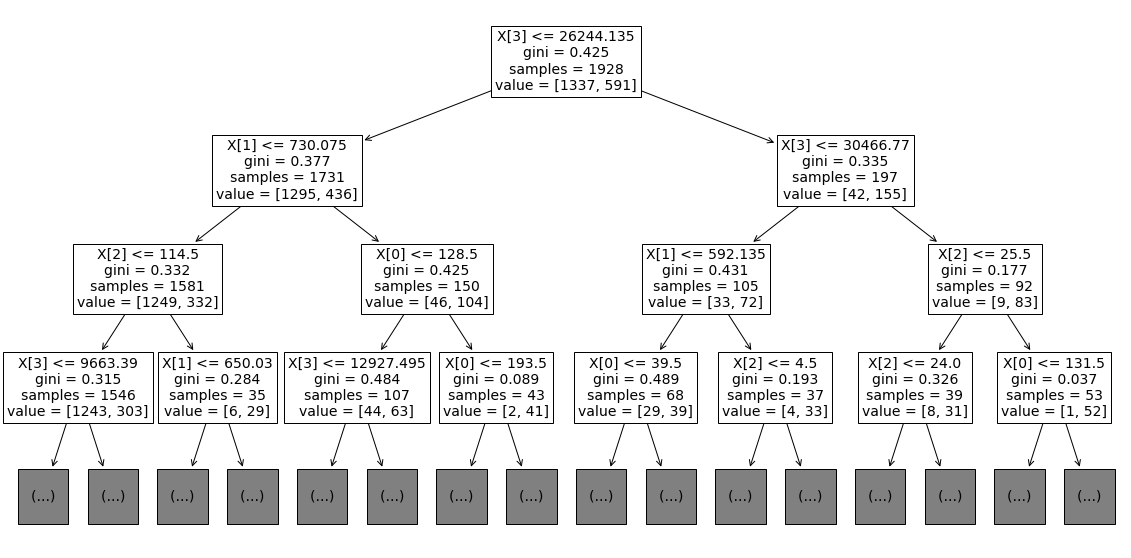

In [24]:
plt.figure(figsize=(20, 10))

plot_tree(fit, max_depth=3, fontsize=14)
plt.show()

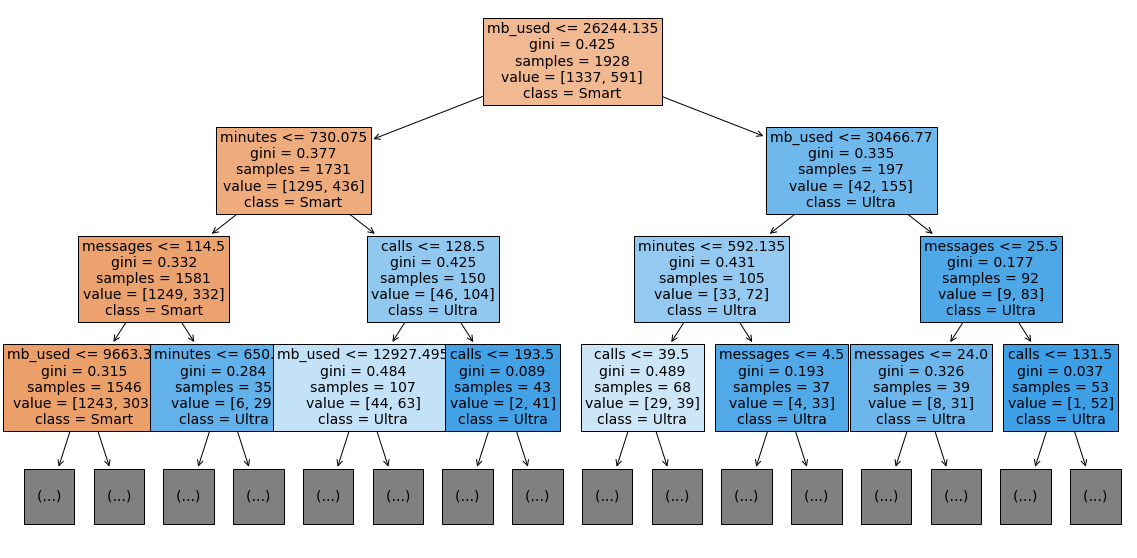

In [25]:
plt.figure(figsize=(20, 10))

plot_tree(fit, feature_names=features.columns.values, 
               class_names=['Smart','Ultra'],
               filled=True, max_depth=3, fontsize=14)
plt.show()

#### Вывод Accuracy наилучшей модели на шаге 3 на тестовой выборке: 0.7993779160186625

### Изучим модель - случайный лес

In [26]:
%%time
best_model_rf = None
best_result = 0
best_depth = 0
best_forest = 0

accuracy_train_list = []
accuracy_test_list = []

depth = []


for est in range(1, 100, 10):

    for i in range(1,12):

        model = RandomForestClassifier(random_state=12345,  n_estimators=est, max_depth=i) 
        fit = model.fit(features_train, target_train)

        accuracy_train = model.score(features_train, target_train)
        accuracy_test = model.score(features_test, target_test)
        print("max_depth =", i, ": ", end='')
        print(accuracy_test)

        depth.append(i)
        accuracy_train_list.append(accuracy_train)
        accuracy_test_list.append(accuracy_test)

        if accuracy_test > best_result:
            best_model_rf = model
            best_result = accuracy_test
            best_depth = i
            best_forest = est


print(f"Accuracy наилучшей модели на шаге {best_depth}  на тестовой выборке:", best_result)
print(f"Количество деревьев {best_forest}")

max_depth = 1 : 0.76049766718507
max_depth = 2 : 0.7900466562986003
max_depth = 3 : 0.7744945567651633
max_depth = 4 : 0.7853810264385692
max_depth = 5 : 0.7900466562986003
max_depth = 6 : 0.7962674961119751
max_depth = 7 : 0.7807153965785381
max_depth = 8 : 0.7807153965785381
max_depth = 9 : 0.7807153965785381
max_depth = 10 : 0.7776049766718507
max_depth = 11 : 0.7527216174183515
max_depth = 1 : 0.749611197511664
max_depth = 2 : 0.776049766718507
max_depth = 3 : 0.7853810264385692
max_depth = 4 : 0.7931570762052877
max_depth = 5 : 0.8087091757387247
max_depth = 6 : 0.8055987558320373
max_depth = 7 : 0.8118195956454122
max_depth = 8 : 0.8087091757387247
max_depth = 9 : 0.8087091757387247
max_depth = 10 : 0.807153965785381
max_depth = 11 : 0.8133748055987559
max_depth = 1 : 0.744945567651633
max_depth = 2 : 0.7822706065318819
max_depth = 3 : 0.7962674961119751
max_depth = 4 : 0.7947122861586314
max_depth = 5 : 0.8102643856920684
max_depth = 6 : 0.8118195956454122
max_depth = 7 : 0.8118

In [27]:
print(len(accuracy_test_list))

110


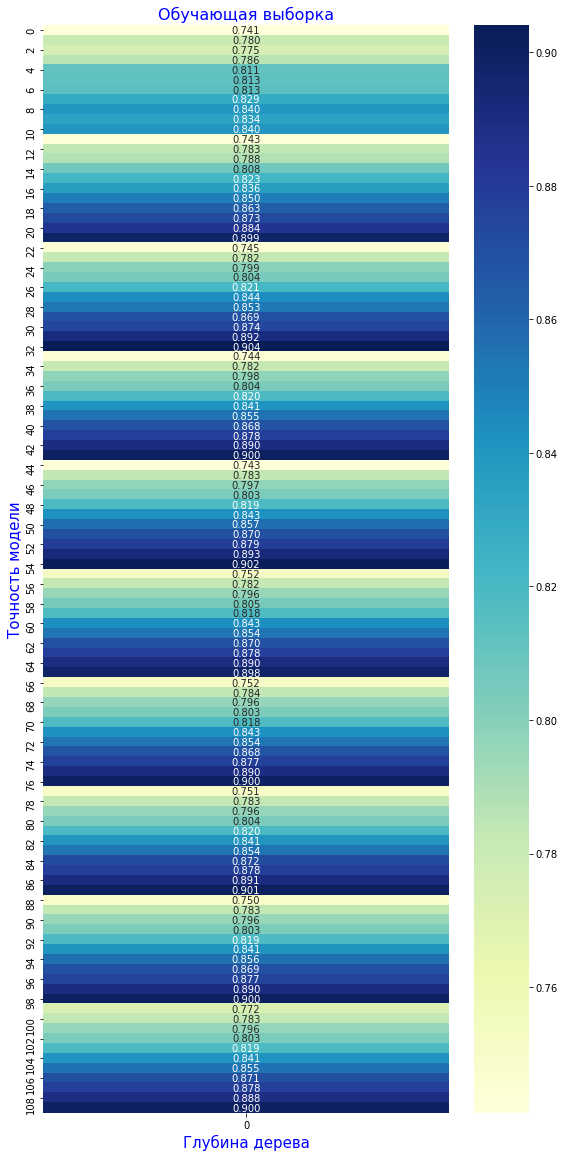

In [28]:
data_train = [[val] for val in accuracy_train_list]
data_test = [[val] for val in accuracy_test_list]


plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(True)
plt.xticks(ticks=np.arange(len(data_train)), rotation=0)
plt.yticks(ticks=np.arange(len(data_train)), rotation=0)
sns.heatmap(data_train, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
plt.xlabel('Глубина дерева', color='Blue', fontsize=15)
plt.ylabel('Точность модели', color='Blue', fontsize=15)
plt.title('Обучающая выборка', color='Blue', fontsize=16)

plt.show()


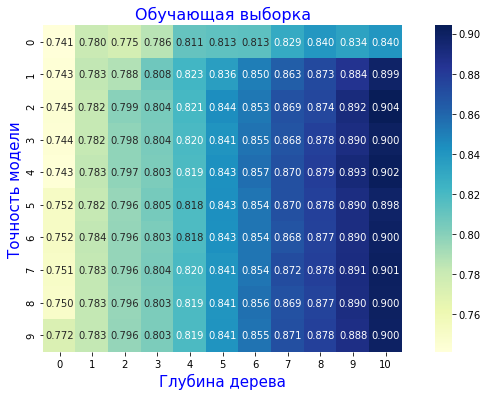

In [29]:
num_columns = 11
num_rows = len(accuracy_train_list) // num_columns
data_train = np.array(accuracy_train_list).reshape(num_rows, num_columns)

# Создаем тепловую карту
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.xticks(ticks=np.arange(num_columns), rotation=0)
plt.yticks(ticks=np.arange(num_rows), rotation=0)
sns.heatmap(data_train, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True, square=True)
plt.xlabel('Глубина дерева', color='Blue', fontsize=15)
plt.ylabel('Точность модели', color='Blue', fontsize=15)
plt.title('Обучающая выборка', color='Blue', fontsize=16)
plt.show()

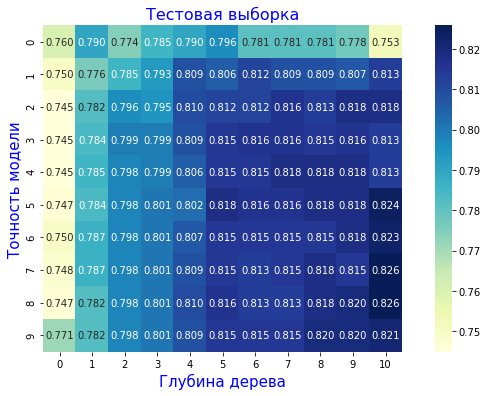

In [30]:
num_columns = 11
num_rows = len(accuracy_test_list) // num_columns
data_test = np.array(accuracy_test_list).reshape(num_rows, num_columns)

# Создаем тепловую карту
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.xticks(ticks=np.arange(num_columns), rotation=0)
plt.yticks(ticks=np.arange(num_rows), rotation=0)
sns.heatmap(data_test, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True, square=True)
plt.xlabel('Глубина дерева', color='Blue', fontsize=15)
plt.ylabel('Точность модели', color='Blue', fontsize=15)
plt.title('Тестовая выборка', color='Blue', fontsize=16)
plt.show()

#### Вывод Accuracy наилучшей модели на шаге 11  на тестовой выборке: 0.8258164852255054
Количество деревьев 71

### Изучим модель - Логическая Регрессия

In [31]:
best_model_lr = None
best_result = 0

depth = []
accuracy_train_list = []
accuracy_test_list = []


best_iter = 0
for est in range(1, 3001, 50):
    model =  LogisticRegression(random_state=12345, solver = 'lbfgs', max_iter = est) 
    model.fit(features_train, target_train)
    model.predict(features_test)
    
    accuracy_train = model.score(features_train, target_train)
    accuracy_test = model.score(features_test, target_test)
    print("max_depth =", est, ": ", end='')
    print(accuracy_test)
    
    depth.append(i)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

    if accuracy_test > best_result:
        best_model_lr = model
        best_result = accuracy_test

        best_iter = est


print(f"Accuracy наилучшей модели на тестовой выборке: { best_result}\n")
print(f"Лучшая итерация {best_iter}")

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

max_depth = 1 : 0.6936236391912908
max_depth = 51 : 0.7076205287713841
max_depth = 101 : 0.7371695178849145
max_depth = 151 : 0.7371695178849145
max_depth = 201 : 0.7371695178849145
max_depth = 251 : 0.7371695178849145
max_depth = 301 : 0.7371695178849145
max_depth = 351 : 0.7371695178849145
max_depth = 401 : 0.7371695178849145
max_depth = 451 : 0.7371695178849145
max_depth = 501 : 0.7371695178849145
max_depth = 551 : 0.7371695178849145
max_depth = 601 : 0.7371695178849145
max_depth = 651 : 0.7371695178849145
max_depth = 701 : 0.7371695178849145
max_depth = 751 : 0.7371695178849145
max_depth = 801 : 0.7371695178849145
max_depth = 851 : 0.7371695178849145
max_depth = 901 : 0.7371695178849145
max_depth = 951 : 0.7371695178849145
max_depth = 1001 : 0.7371695178849145
max_depth = 1051 : 0.7371695178849145
max_depth = 1101 : 0.7371695178849145
max_depth = 1151 : 0.7371695178849145
max_depth = 1201 : 0.7371695178849145
max_depth = 1251 : 0.7371695178849145
max_depth = 1301 : 0.73716951788491

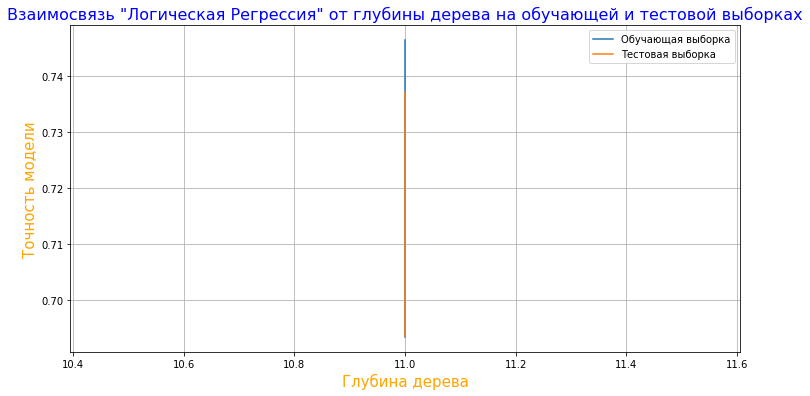

In [32]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(depth, accuracy_train_list)
plt.plot(depth, accuracy_test_list)
plt.xlabel('Глубина дерева', color = 'Orange', fontsize=15)
plt.ylabel('Точность модели', color = 'Orange', fontsize=15)
plt.title('Взаимосвязь "Логическая Регрессия" от глубины дерева на обучающей и тестовой выборках', 
          color = 'Blue', fontsize=16)
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

#### Вывод Accuracy наилучшей модели на тестовой выборке: 0.7371695178849145
Лучшая итерация 101

### Вывод:
Мы рассмотрели три модели:
* дерево решений - Accuracy наилучшей модели на шаге 3 на тестовой выборке: 0.7993779160186625
* лес деревьев - Accuracy наилучшей модели на шаге 11  на тестовой выборке: 0.8258164852255054. Количество деревьев 71.
* логическая регрессия - Accuracy наилучшей модели на тестовой выборке: 0.7371695178849145. Лучшая итерация 101



## Проверьте модель на тестовой выборке

### Лучшая модель лес деревьев. Протестируем  на тестовой выборке.


In [33]:
best_model_rf = RandomForestClassifier(random_state=12345,  n_estimators=71, max_depth=11) 
best_model_rf.fit(features_train, target_train)

accuracy = best_model_rf.score(features_valid, target_valid)

print(accuracy)

0.8180404354587869


#### Вывод  На валидной выборке тестовая модель показала себя - 0.82

In [34]:
union_train_test_features = pd.concat([features_train, features_valid], axis=0)
union_train_test_target = pd.concat([target_train, target_valid], axis=0)

Точность: 0.8118195956454122
Recall:   0.5279187817258884
F1-Score: 0.6322188449848024
Confusion Matrix:
[[418  28]
 [ 93 104]]


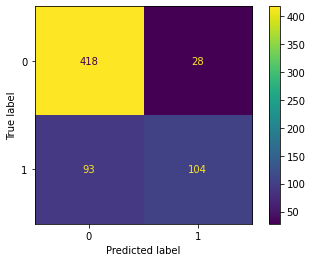

In [35]:
best_model_rf = RandomForestClassifier(random_state=12345,  n_estimators=71, max_depth=11) 
best_model_rf.fit(union_train_test_features, union_train_test_target)
predict = best_model_rf.predict(features_test)


accuracy = accuracy_score(target_test, predict)
recall = recall_score(target_test, predict)
f1 = f1_score(target_test, predict)
confusion = confusion_matrix(target_test, predict)


print(f'Точность: {accuracy}')
print(f'Recall:   {recall}')
print(f'F1-Score: {f1}')
print('Confusion Matrix:')
print(confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()


## Проверяем модели на адекватность

In [36]:
adeq = DummyClassifier(strategy='most_frequent', random_state=12345)  
adeq.fit(features_train, target_train)
adeq.score(features_valid, target_valid)

0.6936236391912908

In [37]:
for i in ["most_frequent", "prior", "stratified", "uniform"]:
    adeq = DummyClassifier(strategy=i, random_state=12345)
    adeq.fit(features_train, target_train)
    adeq_test = adeq.score(features_test, target_test)
    adeq_valid = adeq.score(features_valid, target_valid)
    print(f"Accuracy тестовой выборки для {i} = {adeq_test}")
    print(f"Accuracy валидационной выборки для {i} = {adeq_valid}\n")
    

Accuracy тестовой выборки для most_frequent = 0.6936236391912908
Accuracy валидационной выборки для most_frequent = 0.6936236391912908

Accuracy тестовой выборки для prior = 0.6936236391912908
Accuracy валидационной выборки для prior = 0.6936236391912908

Accuracy тестовой выборки для stratified = 0.578538102643857
Accuracy валидационной выборки для stratified = 0.5878693623639192

Accuracy тестовой выборки для uniform = 0.4821150855365474
Accuracy валидационной выборки для uniform = 0.49144634525660963



### Вывод
Существуют следующие колонки
---  ------    --------------  -----  
*    calls     количество звонков
*    minutes   Сколько абонент разговаривал
*    messages  Сколько смс отправил
*    mb_used   Сколько пользователь пользовался интернетом в разрезе объема мегабайт
*    is_ultra  Подключен ли пользователь к тарифу Ультра
 
 
Данные не сбаланированы - Пользователей без "ультры" в 3 раза больше. Сбалансировали методом stratify - чтобы не сбалансированность данных была везде одинаковая.
 
 
 Проанализировал несколько видов Машинного обучения - Пришел к выводу что случайный лес наиболее подходящая угадывает 8 из 10.